### Importing the required primary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #library used for visualizing the missing values in the dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
''' Importing the dataset '''
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

''' We have total 891 rows and 12 columns in this dataset '''

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


''' Dataset Information '''
* 5 - Object Datatype
* 5 - Int datatype
* 2 - Float datatype

### Exploratory Data Analysis
Let's begin some EDA! We'll start by checking out the missing values

In [6]:
df.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

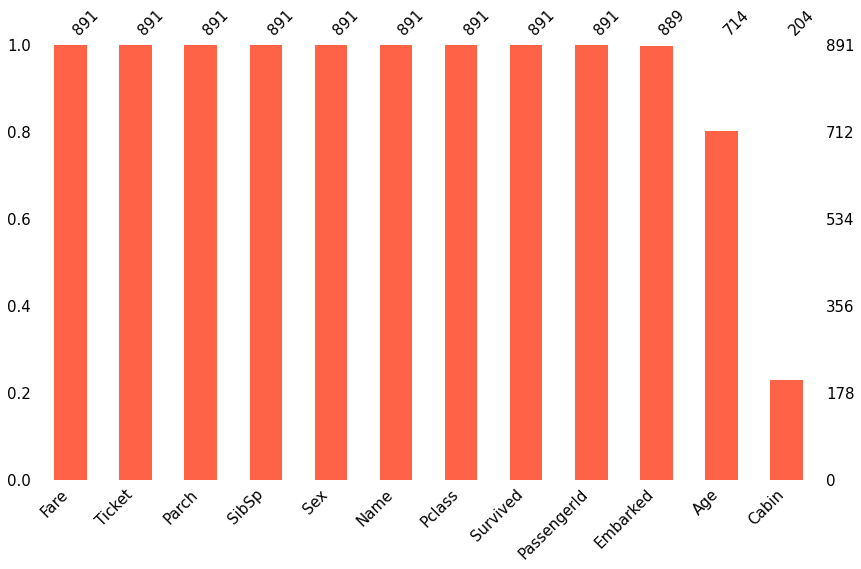

In [7]:
msno.bar(df,color='tomato',figsize=(14,8),fontsize=15,sort='descending')
plt.show()

''' Its observed that there are too many missing values in Age (20%) and Cabin (75%), let's analyse and check whether we can drop these columns.
Also, we can see 2 missing values in Embarked which we can drop.'''

''' It is observed that the column has 80% missing values and few columns which will not contribute much model building '''
* Hence, we are removing columns such as 'PassengerId','Name','Ticket','Cabin'.

In [8]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [9]:
df.shape

(891, 8)

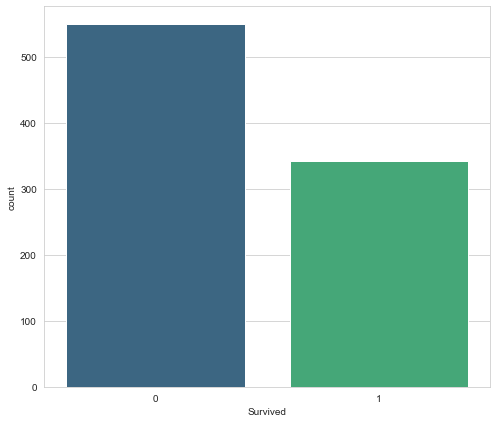

In [10]:
plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='viridis')
plt.show()

''' With the help of the abot plot, we can observe that more than 550 people did not survive and nearly 350 people have survived.'''
* Also, noticed that the data is quiet balanced

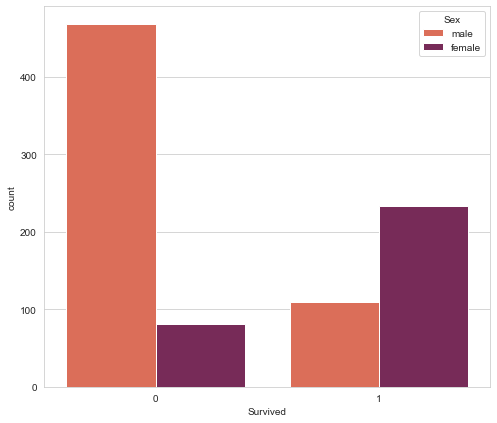

In [11]:
plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rocket_r')
plt.show()

''' Survived vs Sex '''

''' With the help of above plot, it's clear that the number of female survivors are more compared to the male count. '''

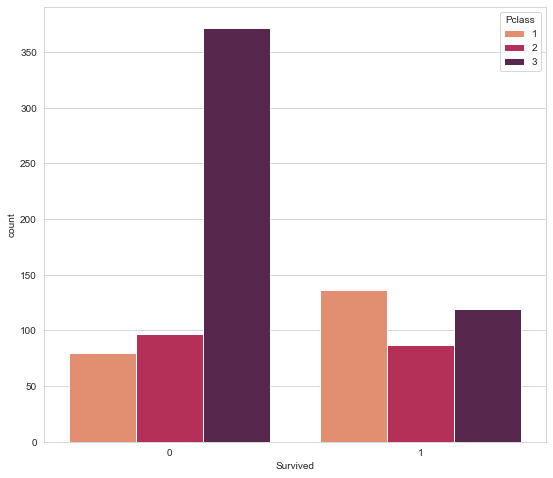

In [12]:
plt.figure(figsize=(9,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rocket_r')
plt.show()

''' Survived vs Passenger Class '''

Great! with the above plot, we understand that
* Class 1 - Survived are more compared to non survived passengers
* Class 2 - Survived are less compared to non survived passengers
* Class 3 - Non Survived are more than 350 compared to survived passengers.

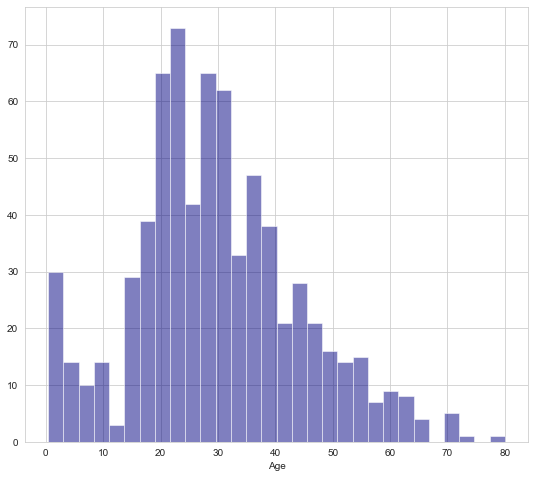

In [13]:
plt.figure(figsize=(9,8))
sns.distplot(df['Age'].dropna(),kde=False,color='navy',bins=30, hist_kws={'alpha':0.5})
plt.show()

''' Dropping the na value as we have 20% missing values in Age feature '''

In this plot we can observe that the average passengers whoe are aging between 17 years to 40 years.
* It's a kind of normally distributed with some outliers.

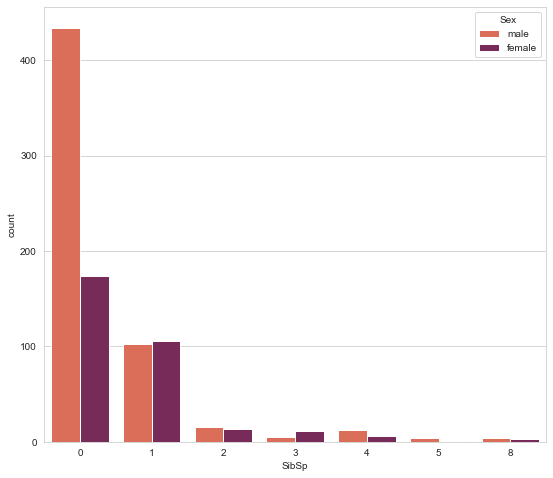

In [14]:
plt.figure(figsize=(9,8))
sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Sex',data=df,palette='rocket_r')
plt.show()

''' Sibling or Spouse vs Sex '''
* with the above plot we can observe that the maximum number of passengers didn't had sibling or spouse.
* the 1 count is more related to spouse.

### Data Cleaning

''' We need to fill in the missing values in Age as we certainly notice some sort of relationship between Age and other features. One way to do this is by filling in the mean age of passenger '''

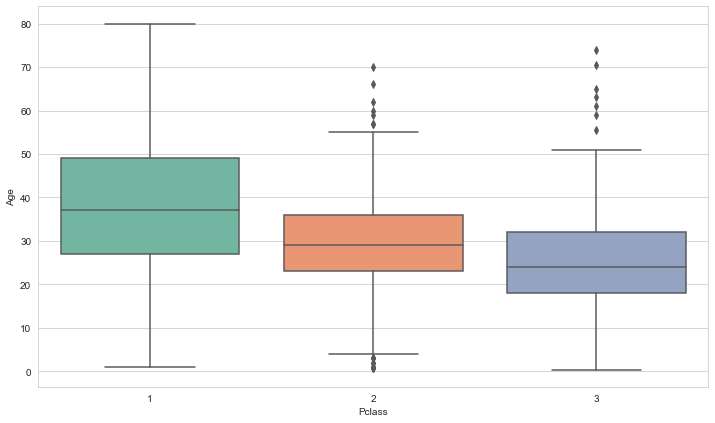

In [15]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y="Age",data=df,palette='Set2')
plt.show()

''' Passenger Class vs Age to check the average passenger age with respect to each class '''
* Class 1 - 38
* Class 2 - 29
* Class 3 - 24

We can see that the passengers in the higher class tend to be older, which makes sens. We'll use these average values to impute.

In [16]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [17]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
df.dropna(inplace=True)

We have replaced the mean value of each class in Age feature and we have removed missing values from Embarked column. Now, lets check the heatmap to find any missing values.

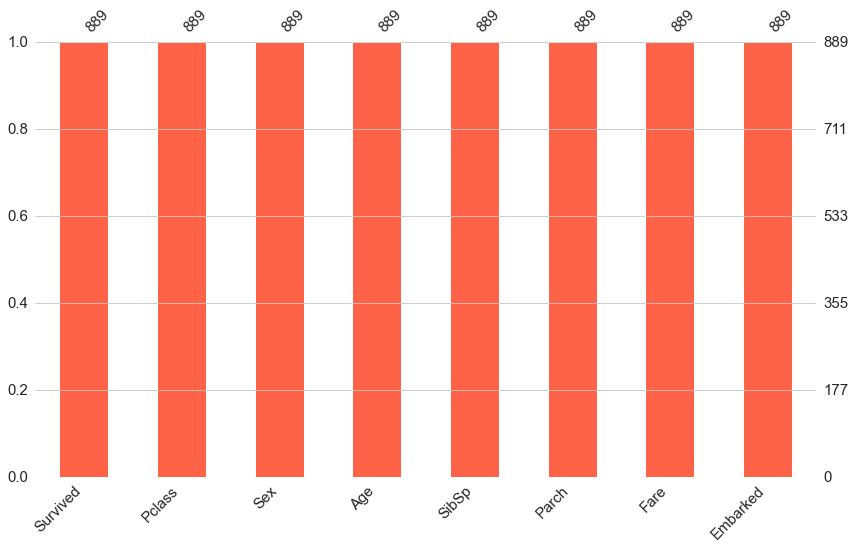

In [19]:
msno.bar(df,color='tomato',figsize=(14,8),fontsize=15)
plt.show()

### Categorical Features

Now we need to convert categorical features into dummy variables!

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Sex       889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [21]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
df = pd.concat([df,Sex,Embarked],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
df.rename({'male':'Sex'},axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


''' Sex '''
* Male = 1
* Female = 0

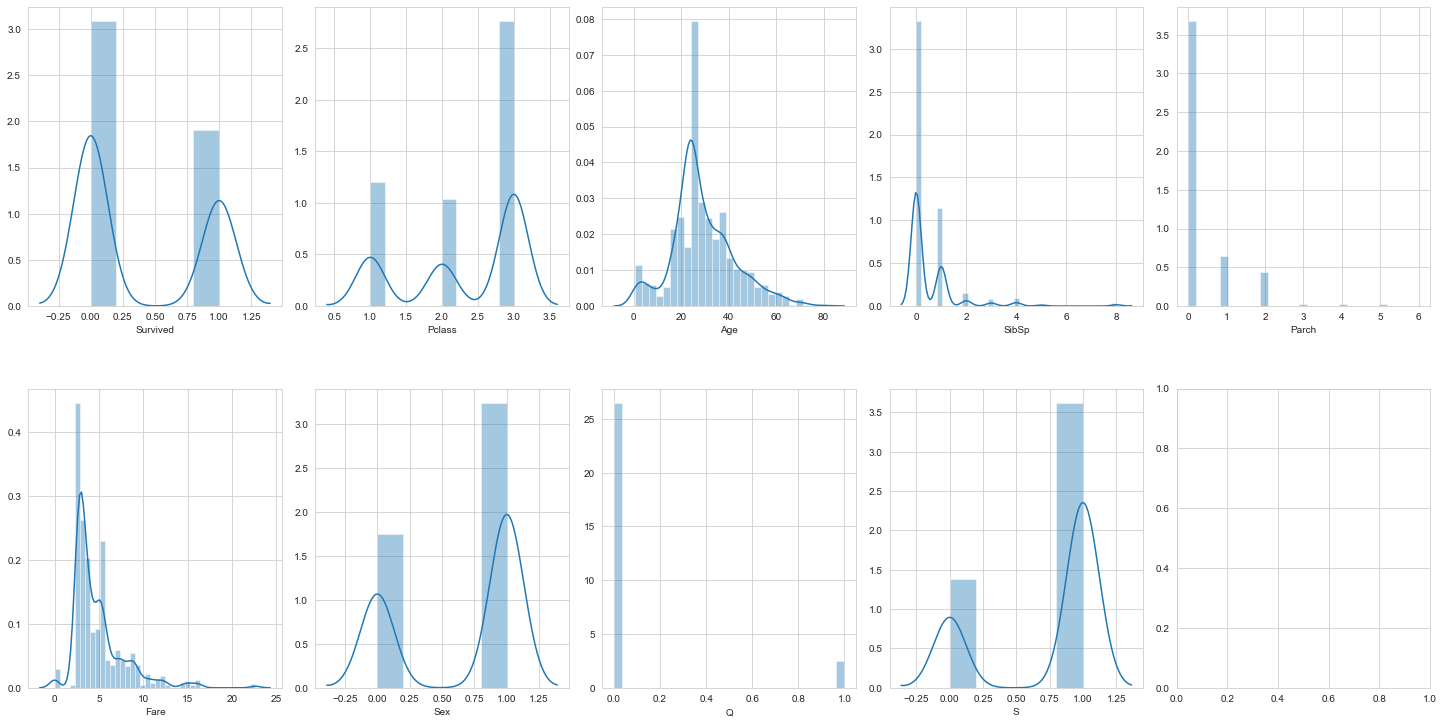

In [35]:
# create distplot
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
        sns.distplot(value,ax=ax[index])
        index+= 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [36]:
'''from the above graph we can notice that there is a skewness in Fare column which we be handle with the square root transformation.'''
df['Fare'] = np.sqrt(df['Fare'])

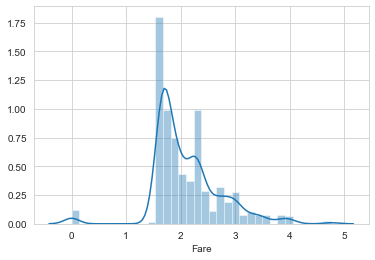

In [37]:
sns.distplot(df['Fare'])

# ''' Now the data is ready for model Building! '''

In [38]:
'''Splitting the data as dependent and independant variables'''
x = df.drop('Survived',axis=1)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,3,22.0,1,0,1.640909,1,0,1
1,1,38.0,1,0,2.905674,0,0,0
2,3,26.0,0,0,1.677837,0,0,1
3,1,35.0,1,0,2.699440,0,0,1
4,3,35.0,0,0,1.684414,1,0,1


In [39]:
y=df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [42]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    predLR = RF.predict(x_test)
    acc = accuracy_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('The best accuracy score is ',maxAccu,'On Random State',maxRS)

The best accuracy score is  0.8876404494382022 On Random State 68


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=68)

### Logistic Regression

In [44]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8539325842696629
[[97  6]
 [20 55]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       103
           1       0.90      0.73      0.81        75

    accuracy                           0.85       178
   macro avg       0.87      0.84      0.85       178
weighted avg       0.86      0.85      0.85       178



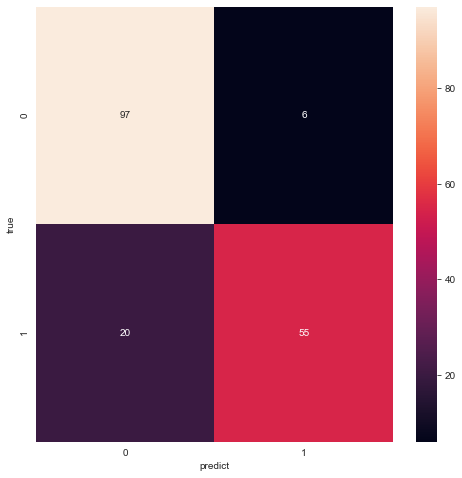

In [45]:
cml=confusion_matrix(y_test,predLR)
plt.figure(figsize=(8,8))
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

### RandomForesClassifier

In [46]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.8820224719101124
[[99  4]
 [17 58]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       103
           1       0.94      0.77      0.85        75

    accuracy                           0.88       178
   macro avg       0.89      0.87      0.88       178
weighted avg       0.89      0.88      0.88       178



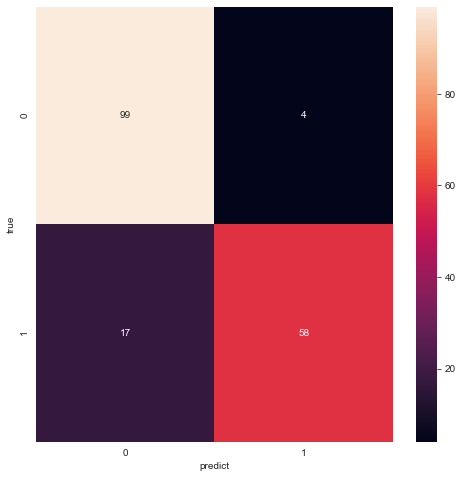

In [47]:
cml=confusion_matrix(y_test,predRF)
plt.figure(figsize=(8,8))
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

### DecisionTreeClassifier

In [48]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
preDT = DT.predict(x_test)
print(accuracy_score(y_test,preDT))
print(confusion_matrix(y_test,preDT))
print(classification_report(y_test,preDT))

0.8370786516853933
[[92 11]
 [18 57]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.84      0.76      0.80        75

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



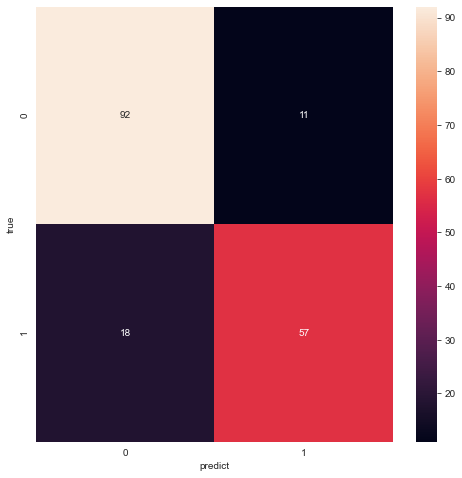

In [49]:
cml=confusion_matrix(y_test,preDT)
plt.figure(figsize=(8,8))
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8651685393258427
[[102   1]
 [ 23  52]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       103
           1       0.98      0.69      0.81        75

    accuracy                           0.87       178
   macro avg       0.90      0.84      0.85       178
weighted avg       0.89      0.87      0.86       178



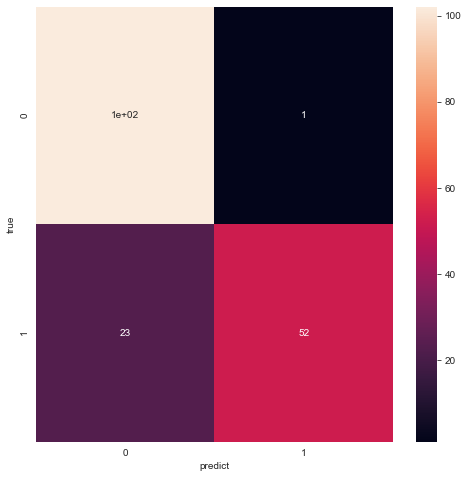

In [51]:
cml=confusion_matrix(y_test,predsvc)
plt.figure(figsize=(8,8))
axl = sns.heatmap(cml,annot=True)
axl.set(xlabel='predict',ylabel='true')
plt.show()

In [52]:
SCR=cross_val_score(LR,x,y,cv=5)
print('cross validation score for LogisticRegression is:',SCR.mean())

cross validation score for LogisticRegression is: 0.793055291055672


In [53]:
SCR=cross_val_score(RF,x,y,cv=5)
print('cross validation score for RandomForestClassifier is:',SCR.mean())

cross validation score for RandomForestClassifier is: 0.8087919761315305


In [54]:
SCR=cross_val_score(DT,x,y,cv=5)
print('cross validation score for DecisionTreeClassifier is:',SCR.mean())

cross validation score for DecisionTreeClassifier is: 0.7784295054910175


In [56]:
SCR=cross_val_score(svc,x,y,cv=5)
print('cross validation score for SupportVectorMachin is:',SCR.mean())

cross validation score for SupportVectorMachin is: 0.8110264711483527


''' With the cross validation we understand that Support vector machin model is giving the accuracy of 81.10 which is least difference with the actual accuracy score of 83.70'''

# Hyper Parameter Tuning

In [57]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [58]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [59]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.762 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.845 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [61]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


In [62]:
grid_predictions = grid.predict(x_test)

In [63]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.96      0.72      0.82        75

    accuracy                           0.87       178
   macro avg       0.90      0.85      0.86       178
weighted avg       0.89      0.87      0.87       178



Here we go! after hyper parameter tuning we have arrived at 87%.
* Hence, we are chosing support vector machine model with the accuracy score of 87%

### Saving the Model

In [66]:
import pickle
filename = 'Titanic1.pkl'
pickle.dump(svc,open(filename,'wb'))

### Conclusion

In [67]:
load_mod = pickle.load(open('Titanic1.pkl','rb'))
result=(load_mod.score(x_test,y_test)*100)
print(result)

86.51685393258427


In [68]:
conclusion=pd.DataFrame([load_mod.predict(x_test)[:],predsvc[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Predicted,1,0,1,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
Original,1,0,1,0,1,1,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [69]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

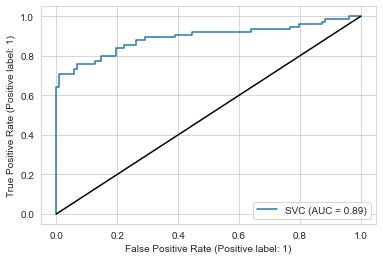

In [70]:
plot_roc_curve(svc,x_test,y_test)
plt.plot([0,1],[0,1],c='k')

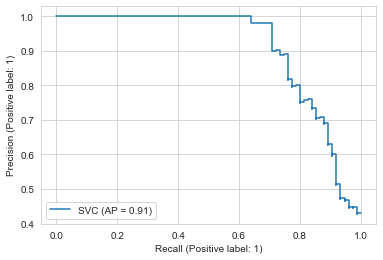

In [71]:
plot_precision_recall_curve(svc,x_test,y_test)
#plt.plot([0,1],[0,1],c='k')